# OpenAnalytica

## Table of contents
1. [Import Dependencies](#import_dependencies) <br />
2. [Prepare Data](#prepare_data) <br />
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. [Load Voter Data](#load_data) <br />
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. [Preview Voter Data](#preview_data) <br />
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. [Voter Data Quality & Summary Statistics](#quality_check) <br />
3. [Visualize Voters & Turnout](#visualize) <br />
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. [Plot age distribution of all registered voters](#plot_all_voters) <br />
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. [Plot age distribution of voters who turned out for each election](#plot_all_elections) <br />
4. [Create Voter Segments](#create_segments) <br />

## Import Dependencies <a name="import_dependencies"></a>

In [2]:
from __future__ import division
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from ggplot import *
from datetime import datetime
import pandas as pd
import itertools
from IPython.display import HTML, display
from helper_functions import *
import warnings
warnings.filterwarnings('ignore')

## Prepare Data <a name="prepare_data"></a>

### Load Voter Data <a name="load_data"></a>

In [3]:
## Set base filepath & import the voter files as pandas dataframes
base_file_path = "/Users/myusername/.virtualenvs/myfolder/"

vf_path = base_file_path + "My_District-VF.csv"
vh_path = base_file_path + "My_District-VH.csv"

voter_file, voter_history = make_dataframes(vf_path, vh_path)
voter_file, voter_history = clean_dataframes(voter_file, voter_history)

### Preview Voter Data <a name="preview_data"></a>

In [4]:
#voter_file.head(5)

In [5]:
#voter_history.head(5)

### Voter Data Quality & Summary Statistics <a name="quality_check"></a>

In [4]:
data_quality_check(voter_file, voter_history)

TOTAL REGISTERED VOTERS IN DISTRICT (Voter File): 83909
TOTAL VOTES CAST OVER ALL ELECTIONS (Voter History): 245056


VOTER FILE ROWS MISSING
first_name: 0.0%
middle_name: 5.9%
last_name: 0.0%
email1: 83.4%
born_at: 0.0%
sex: 0.0%
primary_country: 14.2%
primary_state: 0.0%
primary_city: 0.0%
primary_county: 0.0%
primary_zip: 0.0%
primary_address1: 0.0%
primary_address2: 93.9%
primary_address3: 100.0%


PERCENT OF ROWS WITH UNDEFINED GENDER (i.e. not male or female): 10.9%


VOTER HISTORY ROWS MISSING
first_name: 0.0%
last_name: 0.0%
election_at: 0.0%
ballot_vote_method: 0.0%
ballot_party: 68.8%


## Visualize Voters & Turnout <a name="visualize"></a>

### Plot age distribution of all registered voters <a name="plot_all_voters"></a>

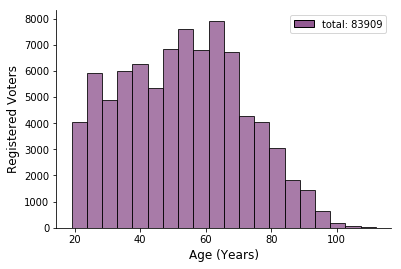

In [5]:
age_distribution(voter_file)

### Plot age distribution of voters who turned out for each election <a name="plot_all_elections"></a>

In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

'General 11-2016 election has no data'

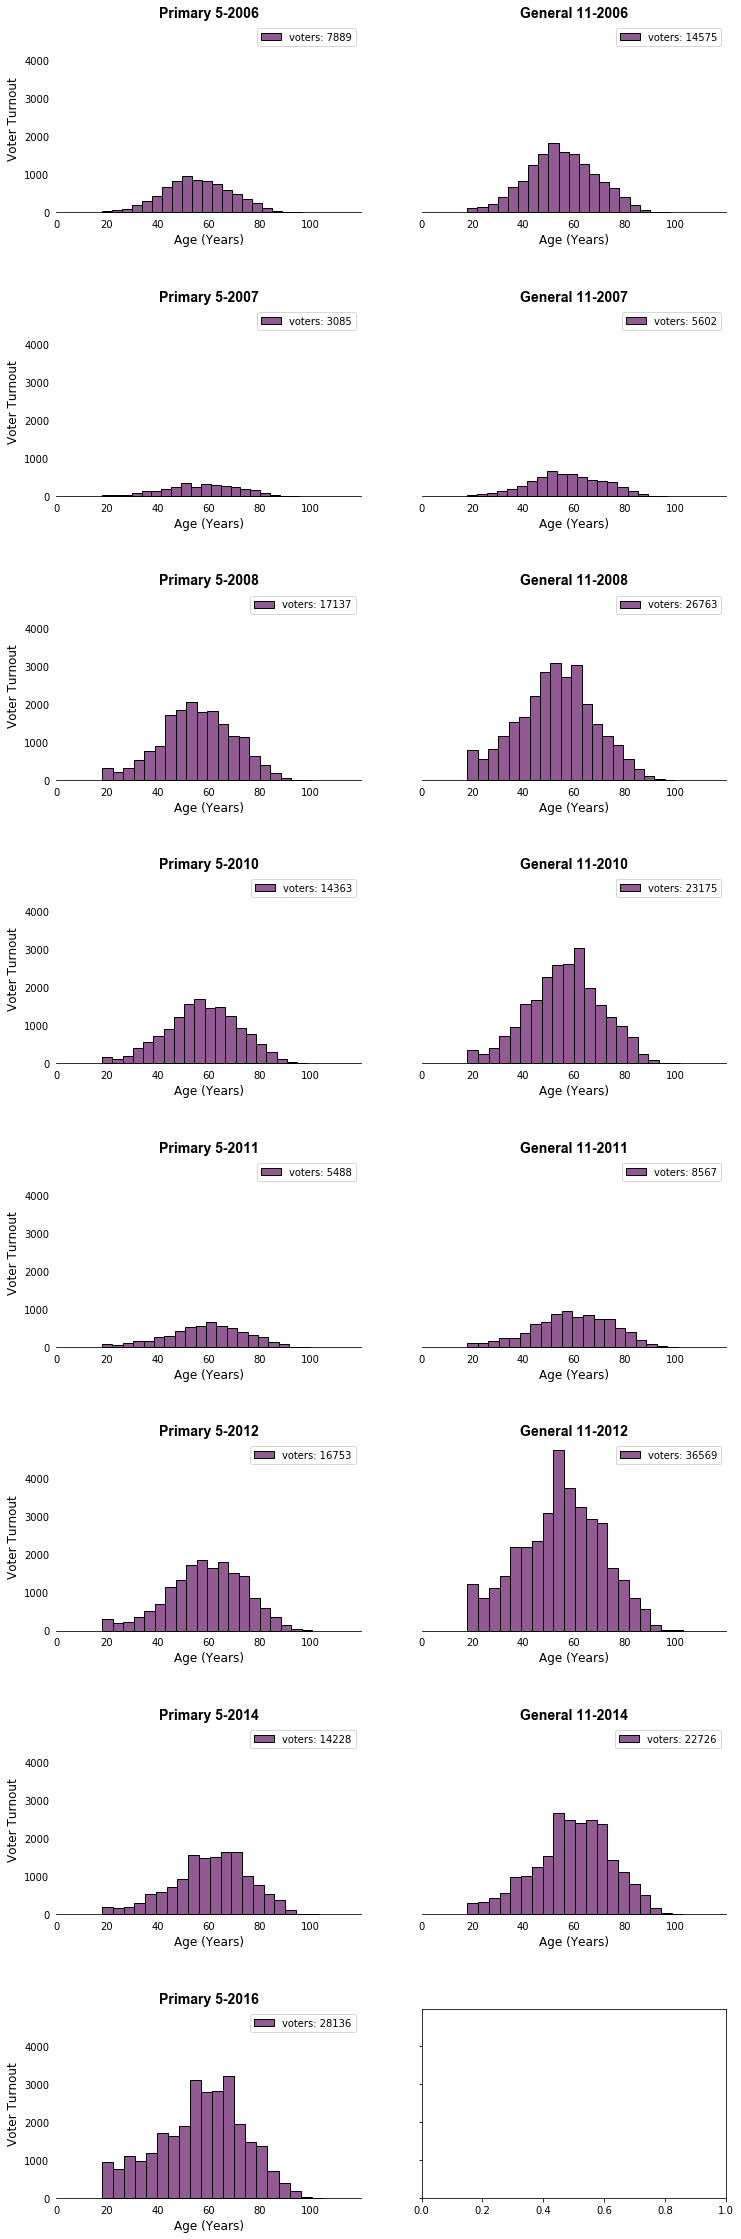

In [7]:
elections = get_elections(voter_history)
age_distribution_by_election(voter_file, voter_history, elections)

## Create Voter Segments <a name="create_segments"></a>

In [10]:
df = segments_table(voter_file, voter_history, base_file_path)
display(HTML(df.to_html()))

Congratulations! The voter segment CSV files are saved to the base filepath you specified earlier.
